# 20210221_Analysis

## 0.Import packages

### 0.0 Import common python packges

In [2]:
### INTRODUCTION                       ###
### AUTHOR: Martin Jin                 ###
### Date: 20211218                     ###

#A Method to summarize electrochemistry, CO2 and flow meter data.
#enter folder/file path to start
#for 20211212 data


import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import csv
import sys
import glob
from matplotlib.ticker import MultipleLocator
from scipy.fft import fft,ifft
import pickle
from scipy.signal import lfilter,savgol_filter
from scipy.optimize import fsolve,root_scalar,ridder,anderson,newton_krylov
import os
#set minor ticks
ml = MultipleLocator(5)
#A Method to summarize electrochemistry, CO2 and flow meter data.

#set minor ticks
ml = MultipleLocator(5)
#A Method to summarize electrochemistry, CO2 and flow meter data.

#set minor ticks
mpl.rcParams['axes.linewidth'] = 2 #set the value globally

#set minor ticks
ml = MultipleLocator(5)
#A Method to summarize electrochemistry, CO2 and flow meter data.

SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('font', size=MEDIUM_SIZE,)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes titl\

plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"


### 0.1 Import packages from co2_project_methods

In [3]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, 'C:\\Users\\Kiana\\Dropbox (Harvard University)\\Aspuru-Aziz-Gordon\\Researchers-files\\Jin\\CO2 Data\\co2_project_methods')
#import all custom function modules
import echem_methods
import gas_methods
import utils
import calc_dic
import plotting

## 1.Data

### 1.0 Import Echem Data

In [4]:
#Import and Process Echem Data
electrochem_path_10mA = 'C://Users//Kiana//Documents//Co2_analysis_data//15btmapaq-10ml-0p05m-longcyling-50pco2//20221006 0d05M 15btmapaq-10ml-50to50co2-longcycling//'
echem_10_ma_dict = echem_methods.create_echem_dfs(electrochem_path_10mA,co2=True,cycle_number=2,outgas_time=47)
echem_10_ma_energy_df = echem_10_ma_dict['energy_df']
echem_10_df = echem_10_ma_dict['echem_df']
time_10_df = echem_10_ma_dict['time_df']
echem_10_df

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]C:\Users\Kiana\Documents\Co2_analysis_data\15btmapaq-10ml-0p05m-longcyling-50pco2\echem_methods.py:238: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(df,ignore_index = True)
C:\Users\Kiana\Documents\Co2_analysis_data\15btmapaq-10ml-0p05m-longcyling-50pco2\echem_methods.py:245: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(df,ignore_index = True)
C:\Users\Kiana\Documents\Co2_analysis_data\15btmapaq-10ml-0p05m-longcyling-50pco2\echem_methods.py:251: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(df,ignore_index = True)
C:\Users\Kiana\Do

,Time,Cycle_number,Echem_process,Voltage,Current,Capacity,pH_left,pH_right,fitted_pH_left,fitted_pH_right,Temperature,Delta_T_s,Time_Delta,Hours
0,2022-10-06 20:07:17.000,1,PWRCHARGE,0.362354,9.986650e-02,0.099866,5.937625,-4.616012,5.945789,-4.614204,37.8087,1.0,0.000000,0.000000
1,2022-10-06 20:07:18.000,1,PWRCHARGE,0.447753,9.986690e-02,0.199733,5.940577,-4.616726,5.946409,-4.614364,38.5803,2.0,0.000278,0.000278
2,2022-10-06 20:07:19.000,1,PWRCHARGE,0.520371,9.986710e-02,0.299600,5.939514,-4.617126,5.947078,-4.614521,39.1680,3.0,0.000556,0.000556
3,2022-10-06 20:07:20.000,1,PWRCHARGE,0.585565,9.986750e-02,0.399468,5.938518,-4.616169,5.947797,-4.614674,39.7583,4.0,0.000833,0.000833
4,2022-10-06 20:07:21.000,1,PWRCHARGE,0.643514,9.986740e-02,0.499335,5.937837,-4.616500,5.948564,-4.614824,40.3782,5.0,0.001111,0.001111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9732,2022-10-06 22:49:22.707,2,Outgas,0.484889,-9.765810e-07,-0.001754,5.944559,-4.696522,5.945387,-4.697914,35.3466,1796.0,2.701389,2.703333
9733,2022-10-06 22:49:23.707,2,Outgas,0.484896,-9.853990e-07,-0.001755,5.944501,-4.695496,5.945405,-4.697908,35.3493,1797.0,2.701667,2.703611
9734,2022-10-06 22:49:24.707,2,Outgas,0.484903,-9.814700e-07,-0.001756,5.944261,-4.696226,5.945424,-4.697902,35.3617,1798.0,2.701944,2.703889
9735,2022-10-06 22:49:25.707,2,Outgas,0.484917,-9.786490e-07,-0.001757,5.944381,-4.697009,5.945442,-4.697896,35.3680,1799.0,2.702222,2.704167


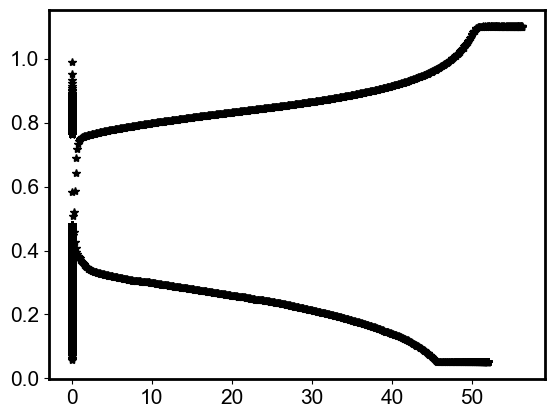

In [5]:
cycle = echem_10_df['Cycle_number']
capacity = echem_10_df['Capacity']
voltage = echem_10_df['Voltage']


for i in range(0,len(capacity),1):
    if cycle[i] == 1:
        if capacity[i]>0:
            plt.plot(capacity[i],voltage[i],'*',color="black")   
        else:
            plt.plot(-capacity[i],voltage[i],'*',color="black") 

    
        

#plt.plot(echem_10_df['Capacity'],echem_10_df['Voltage'],'*')
#plt.plot(echem_10_df['Capacity'],echem_10_df['Voltage'])

### 1.1 Import Gas Data

In [6]:

#Import and Process Gas Data
gas_df=pd.read_csv("C:\\Users\\Kiana\\Documents\\Co2_analysis_data\\15btmapaq-10ml-0p05m-longcyling-50pco2\\Gasflowdata\\202210-06-50co2to50co2-longcycling.txt",low_memory=False,header=0)
gas_df['Datetime']=(gas_df['date']+gas_df['time']).astype(echem_10_df['Time'].dtype)

print(pd.to_datetime(gas_df['Datetime']))
gas_df

0        2022-10-06 19:04:02
1        2022-10-06 19:04:02
2        2022-10-06 19:04:02
3        2022-10-06 19:04:04
4        2022-10-06 19:04:05
                 ...        
102951   2022-10-07 23:44:13
102952   2022-10-07 23:44:14
102953   2022-10-07 23:44:15
102954   2022-10-07 23:44:16
102955   2022-10-07 23:44:17
Name: Datetime, Length: 102956, dtype: datetime64[ns]


,date,time,loop_num,N2 input left(abs val),N2 input right(abs val),CO2 input left(abs val),CO2 input right(abs val),flow sensor left(sccm),flow sensor right(sccm),CO2 sensor left(abs val),CO2 sensor right(abs val),Datetime
0,10/06/2022,19:04:02,0,100,50,0,50,8.78,16.60,1.0,310.0,2022-10-06 19:04:02
1,10/06/2022,19:04:02,0,100,50,0,50,23.45,19.29,1.0,310.0,2022-10-06 19:04:02
2,10/06/2022,19:04:02,0,100,50,0,50,8.78,16.60,1.0,310.0,2022-10-06 19:04:02
3,10/06/2022,19:04:04,0,100,50,0,50,4.37,4.74,3.0,309.0,2022-10-06 19:04:04
4,10/06/2022,19:04:05,0,100,50,0,50,19.90,4.98,1.0,309.0,2022-10-06 19:04:05
...,...,...,...,...,...,...,...,...,...,...,...,...
102951,10/07/2022,23:44:13,0,100,50,0,50,27.24,19.66,0.0,319.0,2022-10-07 23:44:13
102952,10/07/2022,23:44:14,0,100,50,0,50,14.89,16.60,2.0,319.0,2022-10-07 23:44:14
102953,10/07/2022,23:44:15,0,100,50,0,50,25.53,23.94,0.0,319.0,2022-10-07 23:44:15
102954,10/07/2022,23:44:16,0,100,50,0,50,28.10,21.13,2.0,318.0,2022-10-07 23:44:16


In [7]:
#for item in gas_df['flow sensor right(sccm)'].values:
#3    float(item )
gas_df['CO2 sensor right(abs val)']

0         310.0
1         310.0
2         310.0
3         309.0
4         309.0
          ...  
102951    319.0
102952    319.0
102953    319.0
102954    318.0
102955    319.0
Name: CO2 sensor right(abs val), Length: 102956, dtype: float64

### 1.2 Combine Data

In [8]:
#Combine Data 
total_df = utils.merge_echem_gas_df(echem_10_df,gas_df,co2_fit_path = 'C:\\Users\\Kiana\\Documents\\Co2_analysis_data\\15btmapaq-10ml-0p05m-longcyling-50pco2\\20211024_right_CO2_sensor_cubic_spline_fit',co2_heat_conductivity=0.8,flow_offset=11.76+1.8-11.76,max_loop_num=11)

change_gas_df = gas_methods.find_gas_change_time(gas_df,gas_switch_period=864000)

total_df

,date,time,loop_num,N2 input left(abs val),N2 input right(abs val),CO2 input left(abs val),CO2 input right(abs val),flow sensor left(sccm),flow sensor right(sccm),CO2 sensor left(abs val),...,pH_right,fitted_pH_left,fitted_pH_right,Temperature,Delta_T_s,Hours,right_pco2,Corrected_Flow_Right,Corrected_Flow_Right_filtered,CO2Flow
0,10/06/2022,19:04:02,0.0,100.0,50.0,0.0,50.0,8.78,16.60,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.530330,13.039303,-1.592775,6.915139
1,10/06/2022,19:04:02,0.0,100.0,50.0,0.0,50.0,23.45,19.29,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.530330,15.443985,-1.352565,8.190415
2,10/06/2022,19:04:02,0.0,100.0,50.0,0.0,50.0,8.78,16.60,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.530330,13.039303,-1.146485,6.915139
3,10/06/2022,19:04:04,0.0,100.0,50.0,0.0,50.0,4.37,4.74,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.528412,2.439065,-1.088415,1.288832
4,10/06/2022,19:04:05,0.0,100.0,50.0,0.0,50.0,19.90,4.98,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.528412,2.653702,-1.027523,1.402248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102958,10/07/2022,23:44:13,0.0,100.0,50.0,0.0,50.0,27.24,19.66,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.547753,15.706235,16.725007,8.603139
102959,10/07/2022,23:44:14,0.0,100.0,50.0,0.0,50.0,14.89,16.60,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.547753,12.981460,16.642662,7.110635
102960,10/07/2022,23:44:15,0.0,100.0,50.0,0.0,50.0,25.53,23.94,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.547753,19.517358,16.678807,10.690694
102961,10/07/2022,23:44:16,0.0,100.0,50.0,0.0,50.0,28.10,21.13,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.545803,17.023438,16.675732,9.291436


In [9]:
#total_df.columns
total_df

,date,time,loop_num,N2 input left(abs val),N2 input right(abs val),CO2 input left(abs val),CO2 input right(abs val),flow sensor left(sccm),flow sensor right(sccm),CO2 sensor left(abs val),...,pH_right,fitted_pH_left,fitted_pH_right,Temperature,Delta_T_s,Hours,right_pco2,Corrected_Flow_Right,Corrected_Flow_Right_filtered,CO2Flow
0,10/06/2022,19:04:02,0.0,100.0,50.0,0.0,50.0,8.78,16.60,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.530330,13.039303,-1.592775,6.915139
1,10/06/2022,19:04:02,0.0,100.0,50.0,0.0,50.0,23.45,19.29,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.530330,15.443985,-1.352565,8.190415
2,10/06/2022,19:04:02,0.0,100.0,50.0,0.0,50.0,8.78,16.60,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.530330,13.039303,-1.146485,6.915139
3,10/06/2022,19:04:04,0.0,100.0,50.0,0.0,50.0,4.37,4.74,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.528412,2.439065,-1.088415,1.288832
4,10/06/2022,19:04:05,0.0,100.0,50.0,0.0,50.0,19.90,4.98,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.528412,2.653702,-1.027523,1.402248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102958,10/07/2022,23:44:13,0.0,100.0,50.0,0.0,50.0,27.24,19.66,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.547753,15.706235,16.725007,8.603139
102959,10/07/2022,23:44:14,0.0,100.0,50.0,0.0,50.0,14.89,16.60,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.547753,12.981460,16.642662,7.110635
102960,10/07/2022,23:44:15,0.0,100.0,50.0,0.0,50.0,25.53,23.94,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.547753,19.517358,16.678807,10.690694
102961,10/07/2022,23:44:16,0.0,100.0,50.0,0.0,50.0,28.10,21.13,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.545803,17.023438,16.675732,9.291436


In [10]:
total_df['Shifted_Flow_Right'] = total_df['Corrected_Flow_Right']

## 2.Calculation

### 2.0 Calculate amount of CO2 captured and released for each cycle

In [ ]:
total_df

In [ ]:
plotting.plot_baseline_selection(total_df,start = 0,end = 12000,time_change_period=10800)

In [ ]:
plotting.plot_baseline_selection(total_df,capture=False,start=3600,end=10000,vertical_offset=15,ymax=80,title="Outgas Baseline Selection",time_change_period=10800)

In [ ]:
total_df.columns

In [ ]:
amount_arb_baseline_df = gas_methods.calculate_amount(total_df,time_10_df,change_gas_df,capture_parameter = 'Corrected_Flow_Right',outgas_parameter = 'Corrected_Flow_Right',capture_baseline_range=100,outgas_baseline_range=100,capture_period=4600,outgas_period=8600,reverse_outgas_baseline_range=True)
display(amount_arb_baseline_df)
#amount_arb_baseline_df = gas_methods.calculate_amount(total_df,time_20_df,change_gas_df,capture_parameter='Corrected_Flow_Right',outgas_parameter='Corrected_Flow_Right')
#amount_arb_baseline_df

### 2.1 Calculate DIC according to total_df, ehcem_time_df and change_gas_df

In [ ]:
dic_df = calc_dic.calc_DIC(total_df,time_10_df,change_gas_df,outgas_shift=20,flag=0,solver="fsolve")
dic_df

In [ ]:

amount_dic_df = utils.merge_amount_dic_df(dic_df,amount_arb_baseline_df,volume=0.07,pco2=0.3)
amount_dic_df

## 3.Plotting

In [ ]:
plt.plot(echem_10_df['Current'])


### 3.0 Plot all gas and echem data

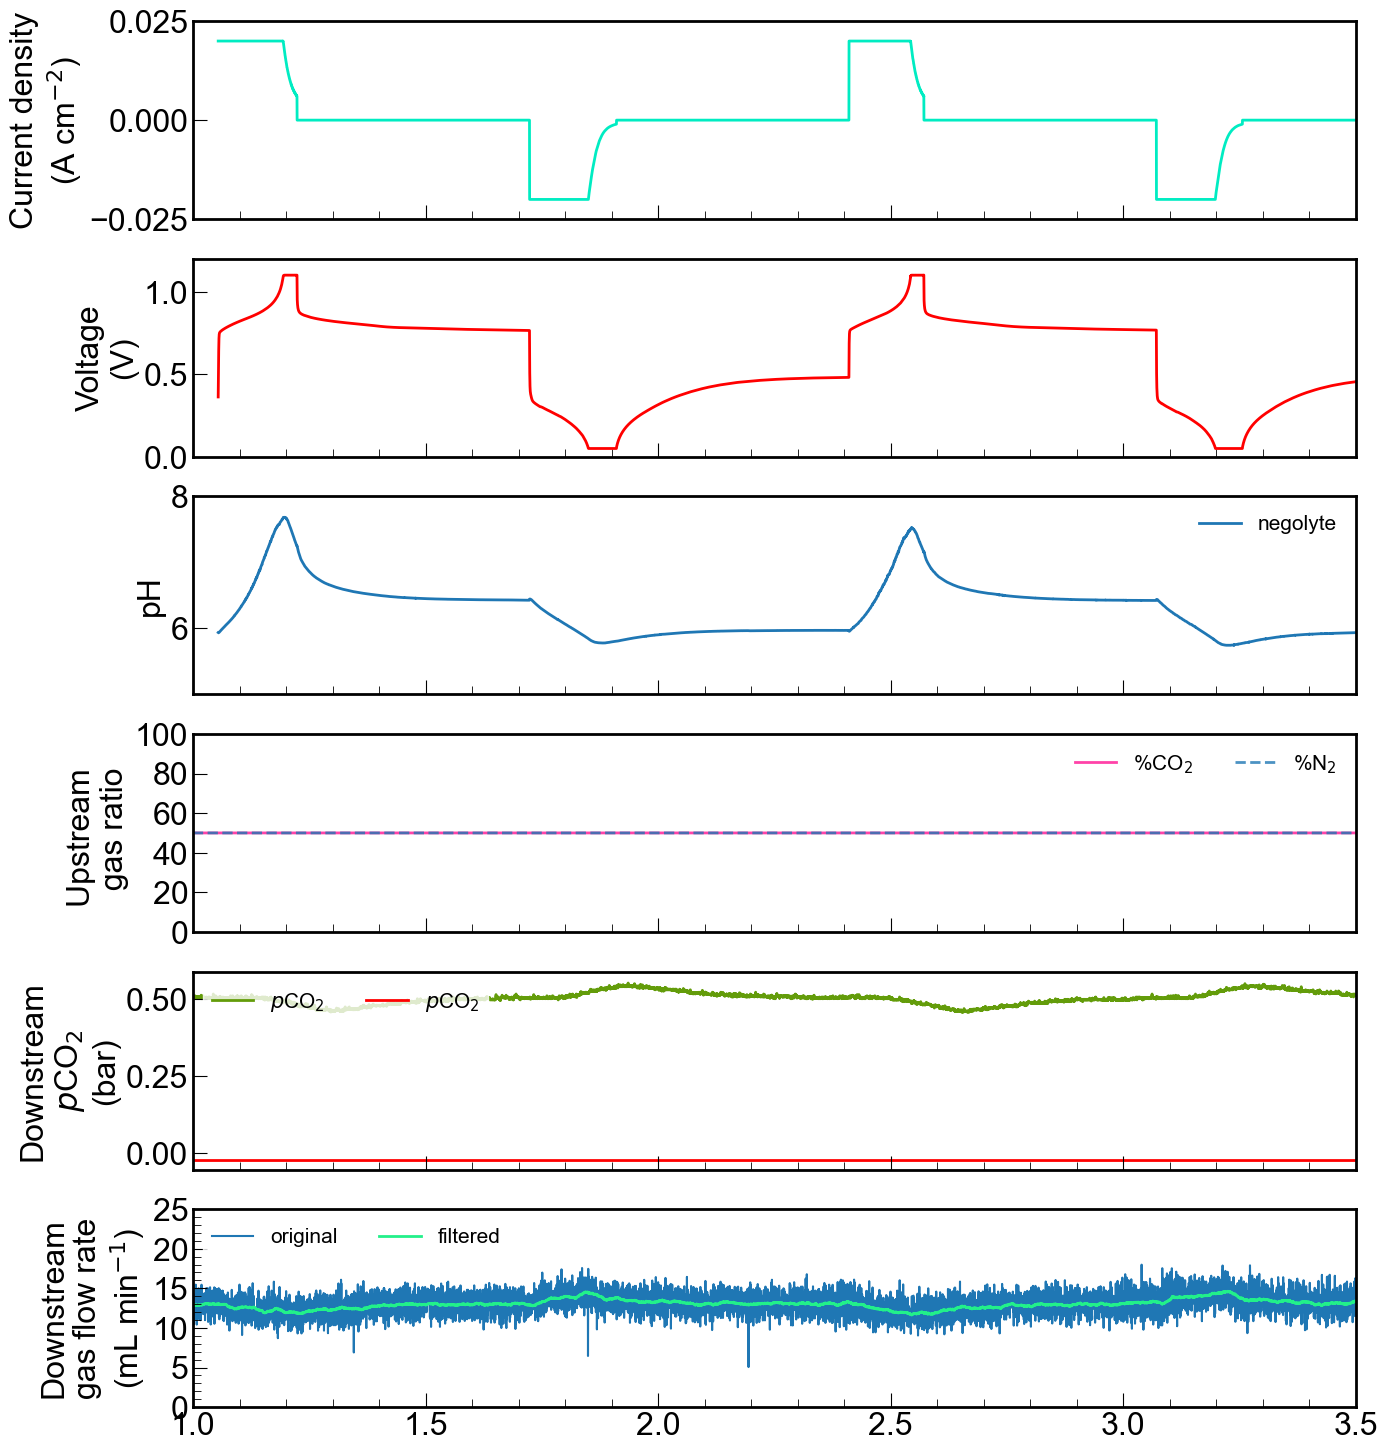

In [27]:
continuous_df = total_df
continuous_df['DeltaT'] = total_df.Time_Delta
size=23
fig,ax = plt.subplots(6,1,figsize =(15,18),sharex=True,gridspec_kw={'hspace': 0.2})

#ax[0].set_xlabel("Date Time (Day Hour:Minute)",fontsize = 25)
ax[0].plot(continuous_df.DeltaT,continuous_df.Current/5,color='#00ECC2',lw=2)
ax[0].tick_params(axis='x', rotation=45)
ax[0].xaxis.set_tick_params(labelsize=size)
ax[0].yaxis.set_tick_params(labelsize=size)
ax[0].set_ylim(-0.025,0.025)
ax[0].set_yticks([-0.025,0,0.025])
ax[0].set_ylabel("Current density\n(A cm$^{-2}$)",fontsize = size)
ax[0].tick_params(axis='x',which='minor',direction='in',length=6)
ax[0].tick_params(axis='x',which='major',direction='in',length=10)

ax[0].tick_params(axis='y',which='minor',direction='in',length=6)
ax[0].tick_params(axis='y',which='major',direction='in',length=10)


ax[1].plot(continuous_df.DeltaT,continuous_df.Voltage,color="red",lw=2)
ax[1].tick_params(axis='x', rotation=45)
ax[1].xaxis.set_tick_params(labelsize=size)
ax[1].yaxis.set_tick_params(labelsize=size)
ax[1].set_ylim(0,1.2)

ax[1].set_ylabel("Voltage\n(V)",fontsize = size)
ax[1].tick_params(axis='x',which='minor',direction='in',length=6)
ax[1].tick_params(axis='x',which='major',direction='in',length=10)

ax[1].tick_params(axis='y',which='minor',direction='in',length=6)
ax[1].tick_params(axis='y',which='major',direction='in',length=10)



ax[2].plot(continuous_df.DeltaT,continuous_df.pH_left,lw=2,zorder=1,label='negolyte')
#ax[2].hlines(8.8,xmin=0,xmax=24.7,color='black')
#ax[2].hlines(7.0,xmin=0,xmax=24.7,color='black')
#ax[2].plot(continuous_df.DeltaT,continuous_df.pH_left,lw=2,zorder=1,label='posolyte')
ax[2].legend(frameon=False,fontsize=15,ncol=2)
#ax[3].tick_params(axis='x', rotation=45)
ax[2].xaxis.set_tick_params(labelsize=size)
ax[2].yaxis.set_tick_params(labelsize=size)
ax[2].set_ylim(5,8)
ax[2].set_ylabel("pH",fontsize = size)
ax[2].tick_params(axis='y',direction='in')
ax[2].tick_params(axis='x',which='both',direction='in')
ax[2].set_yticks([6,8])
ax[2].tick_params(axis='x',which='minor',direction='in',length=6)
ax[2].tick_params(axis='x',which='major',direction='in',length=10)
ax[2].tick_params(axis='y',which='minor',direction='in',length=6)
ax[2].tick_params(axis='y',which='major',direction='in',length=10)

ax[3].plot(continuous_df.DeltaT,continuous_df['CO2 input right(abs val)'],color='deeppink',lw=2,label ="%CO$_2$",alpha=0.8)
ax[3].plot(continuous_df.DeltaT,100-continuous_df['CO2 input right(abs val)'],'--',lw=2, label ="%N$_2$",alpha=0.8)
ax[3].xaxis.set_tick_params(labelsize=size)
ax[3].yaxis.set_tick_params(labelsize=size)
ax[3].set_ylabel("Upstream \n gas ratio",fontsize = size)
ax[3].tick_params(axis='y',direction='in')
ax[3].set_yticks([0,20,40,60,80,100])
ax[3].legend(frameon=True,fontsize=15,ncol=3,facecolor='white',framealpha=0.8,edgecolor='white',loc=0)
ax[3].tick_params(axis='x',which='both',direction='in')
ax[3].tick_params(axis='x',which='minor',direction='in',length=6)
ax[3].tick_params(axis='x',which='major',direction='in',length=10)
ax[3].tick_params(axis='y',which='minor',direction='in',length=6)
ax[3].tick_params(axis='y',which='major',direction='in',length=10)
g  = continuous_df.DeltaT
ax[4].plot(continuous_df.DeltaT,continuous_df['right_pco2']-0.023,color='#639C0A',lw=2,zorder=1,label='$p$CO$_2$')
#ax[4].plot(g[:len(g)-7],gas_df['CO2 sensor right(abs val)']-0.023,color='red',lw=2,zorder=1,label='$p$CO$_2$')

co2_fit_path = co2_fit_path = 'C:\\Users\\Kiana\\Documents\\Co2_analysis_data\\15btmapaq-10ml-0p05m-longcyling-50pco2\\20211024_right_CO2_sensor_cubic_spline_fit'
with open(co2_fit_path,'rb') as f:
    right_co2_fit = pickle.load(f)
    n = 80  # the larger n is, the smoother curve will be
    b = [1.0 / n] * n
    a = 1
    filtered_right = lfilter(b,a,total_df['flow sensor right(sccm)'])
    gas_df['CO2 sensor right(abs val)'] = right_co2_fit(gas_df['CO2 sensor right(abs val)'])
    gas_df['CO2 sensor right(abs val)'] = gas_df['CO2 sensor right(abs val)'].apply(lambda x: np.where(x>0.90,1,x))
    
    filtered_co2_right = lfilter(b,a,gas_df['CO2 sensor right(abs val)'])


ax[4].plot(g[:len(g)-7],filtered_co2_right-0.023,color='red',lw=2,zorder=1,label='$p$CO$_2$')



ax[4].xaxis.set_tick_params(labelsize=size)
ax[4].yaxis.set_tick_params(labelsize=size)
ax[4].set_ylabel("Downstream\n$p$CO$_2$\n(bar)",fontsize = size)
ax[4].tick_params(axis='y',direction='in')
#ax[4].set_yticks([0,0.2,0.4,0.6,0.8,1.0])
ax[4].tick_params(axis='x',which='both',direction='in')
ax[4].tick_params(axis='x',which='minor',direction='in',length=6)
ax[4].tick_params(axis='x',which='major',direction='in',length=10)
ax[4].tick_params(axis='y',which='minor',direction='in',length=6)
ax[4].tick_params(axis='y',which='major',direction='in',length=10)
#ax[4].legend(frameon=False,fontsize=15,ncol=2)
#ax[4].hlines(0.508,xmin=0,xmax=60,color='black',lw=2,linestyle='dotted',zorder=2,label='baseline')
ax[4].legend(frameon=True,fontsize=15,ncol=3,facecolor='white',framealpha=0.8,edgecolor='white',loc=2)
#ax[4].set_ylim(0.45,0.55)
n = 100  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1

shift_val=1.2
#filtered_right = lfilter(b,a,total_df['flow sensor right(sccm)'])
#total_df['right_pco2'] = total_df['right_pco2'].apply(lambda x: np.where(x>0.9,1,x))
ax[5].plot(continuous_df.DeltaT,continuous_df['Corrected_Flow_Right']-shift_val,zorder=0,label='original')
ax[5].plot(continuous_df.DeltaT,continuous_df['Corrected_Flow_Right_filtered']-shift_val,color='#22F08A',zorder=1,label='filtered',lw=2)
ax[5].xaxis.set_tick_params(labelsize=size)
ax[5].yaxis.set_tick_params(labelsize=size)
ax[5].set_ylabel("Downstream\ngas flow rate\n(mL min$^{-1}$)",fontsize = size)
ax[5].tick_params(axis='y',direction='in')
ax[5].set_yticks([0,5,10,15,20,25,30])
ax[5].set_ylim(0,25)
ax[5].tick_params(axis='x',which='both',direction='in')
ax[5].tick_params(axis='x',which='minor',direction='in',length=6)
ax[5].tick_params(axis='x',which='major',direction='in',length=10)
ax[5].legend(frameon=True,fontsize=15,ncol=3,facecolor='white',framealpha=0.8,edgecolor='white',loc=2)

ax[5].tick_params(axis='y',which='minor',direction='in',length=6)
ax[5].tick_params(axis='y',which='major',direction='in',length=10)
#plt.xlim(total_df_array[i].Time_Delta.iloc[start_index]-x_offset,total_df_array[i].Time_Delta.iloc[final_index]-x_offset)
#ax[5].hlines(13,xmin=0,xmax=27,color='black',lw=2,linestyle='dotted',zorder=2,label='baseline')


plt.xlim(1,3.5)

#plt.xlabel('$t$ (hr)',fontsize=size)
#mpl.rcParams['axes.linewidth'] = 2 #set the value globally
#left, bottom, width, height = [0.17, 0.29, 0.23, 0.03]
#ax2 = fig.add_axes([left, bottom, width, height])
#ax2.plot(range(6)[::-1], color='green')
#ax2.plot(continuous_df.DeltaT,savgol_filter(continuous_df['right_pco2'],111,1)-0.023,color='#639C0A',lw=2,zorder=1,label='$p$CO$_2$')
#ax2.set_xlim(0,6)
#ax2.set_ylim(0,1.1)
#ax2.xaxis.set_tick_params(labelsize=size/2)
#ax2.yaxis.set_tick_params(labelsize=size/2)
#ax2.set_ylabel("$p$CO$_2$ \n (bar)",fontsize = size)
#ax2.tick_params(axis='y',direction='in')
#ax2.set_yticks([0.0,0.8])

#ax2.tick_params(axis='x',which='both',direction='in')
#ax2.tick_params(axis='x',which='minor',direction='in',length=3)
#ax2.tick_params(axis='x',which='major',direction='in',length=5)

#ax2.tick_params(axis='y',which='minor',direction='in',length=3)
#ax2.tick_params(axis='y',which='major',direction='in',length=5)
#ax2.hlines(0.51,xmin=0,xmax=13,color='black',lw=2,linestyle='dotted',zorder=2,label='baseline')
plt.minorticks_on()


#left, bottom, width, height = [0.17, 0.18, 0.23, 0.03]
#ax3 = fig.add_axes([left, bottom, width, height])
#ax2.plot(range(6)[::-1], color='green')
#ax3.plot(continuous_df.DeltaT,continuous_df['Corrected_Flow_Right_filtered']-shift_val,color='#22F08A',zorder=1,label='filtered',lw=2)
#ax3.plot(total_df_array[i].Time_Delta-x_offset,total_df_array[i].Corrected_Flow_Right+1.1,zorder=0,label='original')

#ax3.set_xlim(0,27)
#ax3.set_ylim(8,13)
#ax3.xaxis.set_tick_params(labelsize=size/2)
#ax3.yaxis.set_tick_params(labelsize=size/2)
#ax2.set_ylabel("$p$CO$_2$ \n (bar)",fontsize = size)
#ax3.tick_params(axis='y',direction='in')
#ax3.set_yticks([10,11,12,13])

#ax3.tick_params(axis='x',which='both',direction='in')
#ax3.tick_params(axis='x',which='minor',direction='in',length=3)
#ax3.tick_params(axis='x',which='major',direction='in',length=5)

#ax3.tick_params(axis='y',which='minor',direction='in',length=3)
#ax3.tick_params(axis='y',which='major',direction='in',length=5)
#ax3.hlines(9.8,xmin=0,xmax=13,color='black',lw=2,linestyle='dotted',zorder=2,label='baseline')




plt.minorticks_on()




In [ ]:
continuous_df = total_df
continuous_df['DeltaT'] = total_df.Time_Delta
size=23
fig,ax = plt.subplots(6,1,figsize =(15,18),sharex=True,gridspec_kw={'hspace': 0.2})

#ax[0].set_xlabel("Date Time (Day Hour:Minute)",fontsize = 25)
ax[0].plot(continuous_df.DeltaT,continuous_df.Current/5,color='#00ECC2',lw=2)
ax[0].tick_params(axis='x', rotation=45)
ax[0].xaxis.set_tick_params(labelsize=size)
ax[0].yaxis.set_tick_params(labelsize=size)
ax[0].set_ylim(-0.06,0.06)
ax[0].set_yticks([-0.04,0,0.04])
ax[0].set_ylabel("Current density\n(A cm$^{-2}$)",fontsize = size)
ax[0].tick_params(axis='x',which='minor',direction='in',length=6)
ax[0].tick_params(axis='x',which='major',direction='in',length=10)

ax[0].tick_params(axis='y',which='minor',direction='in',length=6)
ax[0].tick_params(axis='y',which='major',direction='in',length=10)


ax[1].plot(continuous_df.DeltaT,continuous_df.Voltage,color="#0078FF",lw=2)
ax[1].tick_params(axis='x', rotation=45)
ax[1].xaxis.set_tick_params(labelsize=size)
ax[1].yaxis.set_tick_params(labelsize=size)
ax[1].set_ylabel("Voltage\n(V)",fontsize = size)
ax[1].set_ylim(0,1.5)
ax[1].tick_params(axis='x',which='minor',direction='in',length=6)
ax[1].tick_params(axis='x',which='major',direction='in',length=10)

ax[1].tick_params(axis='y',which='minor',direction='in',length=6)
ax[1].tick_params(axis='y',which='major',direction='in',length=10)



ax[2].plot(continuous_df.DeltaT,continuous_df.pH_left,lw=2,zorder=1,label='negolyte')
#ax[2].plot(continuous_df.DeltaT,continuous_df.pH_left,lw=2,zorder=1,label='posolyte')
ax[2].legend(frameon=False,fontsize=15,ncol=2)
#ax[3].tick_params(axis='x', rotation=45)
ax[2].xaxis.set_tick_params(labelsize=size)
ax[2].yaxis.set_tick_params(labelsize=size)
ax[2].set_ylim(5,14)
ax[2].set_ylabel("pH",fontsize = size)
ax[2].tick_params(axis='y',direction='in')
ax[2].tick_params(axis='x',which='both',direction='in')
ax[2].set_yticks([6,8,10,12,14])
ax[2].tick_params(axis='x',which='minor',direction='in',length=6)
ax[2].tick_params(axis='x',which='major',direction='in',length=10)
ax[2].tick_params(axis='y',which='minor',direction='in',length=6)
ax[2].tick_params(axis='y',which='major',direction='in',length=10)

ax[3].plot(continuous_df.DeltaT,continuous_df['CO2 input right(abs val)'],color='#FF4359',lw=2,label ="%CO$_2$",alpha=0.8)
ax[3].plot(continuous_df.DeltaT,100-continuous_df['CO2 input right(abs val)'],lw=2, label ="%N$_2$",alpha=0.8)
ax[3].xaxis.set_tick_params(labelsize=size)
ax[3].yaxis.set_tick_params(labelsize=size)
ax[3].set_ylabel("Upstream \n gas ratio",fontsize = size)
ax[3].tick_params(axis='y',direction='in')
ax[3].set_yticks([0,20,40,60,80,100])
ax[3].legend(frameon=True,fontsize=15,ncol=3,facecolor='white',framealpha=0.8,edgecolor='white',loc=0)
ax[3].tick_params(axis='x',which='both',direction='in')
ax[3].tick_params(axis='x',which='minor',direction='in',length=6)
ax[3].tick_params(axis='x',which='major',direction='in',length=10)
ax[3].tick_params(axis='y',which='minor',direction='in',length=6)
ax[3].tick_params(axis='y',which='major',direction='in',length=10)

ax[4].plot(continuous_df.DeltaT,savgol_filter(continuous_df['right_pco2'],111,1)-0.013,color='#639C0A',lw=2,zorder=1,label='$p$CO$_2$')#baseline correction
#ax[4].plot(continuous_df.DeltaT,continuous_df['right_pco2'],111,1)-0.01,color='#639C0A',lw=2,zorder=1,label='$p$CO$_2$')#baseline correction
ax[4].plot(continuous_df.DeltaT,savgol_filter(continuous_df['right_pco2'],111,1)-0.013,color='#639C0A',lw=2,zorder=1,label='$p$CO$_2$')#baseline correction
ax[4].xaxis.set_tick_params(labelsize=size)
ax[4].yaxis.set_tick_params(labelsize=size)
ax[4].set_ylabel("Downstream\n$p$CO$_2$\n(bar)",fontsize = size)
ax[4].tick_params(axis='y',direction='in')
ax[4].set_yticks([0,0.2,0.4,0.6,0.8,1.0])
ax[4].tick_params(axis='x',which='both',direction='in')
ax[4].tick_params(axis='x',which='minor',direction='in',length=6)
ax[4].tick_params(axis='x',which='major',direction='in',length=10)
ax[4].tick_params(axis='y',which='minor',direction='in',length=6)
ax[4].tick_params(axis='y',which='major',direction='in',length=10)
#ax[4].hlines(0.1,xmin=0,xmax=138,color='black',lw=2,linestyle='dotted',zorder=2,label='baseline')

#ax[4].legend(frameon=False,fontsize=15,ncol=2)


n = 80  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
#filtered_right = lfilter(b,a,total_df['flow sensor right(sccm)'])
#total_df['right_pco2'] = total_df['right_pco2'].apply(lambda x: np.where(x>0.9,1,x))
#ax[5].plot(continuous_df.DeltaT,np.where(continuous_df.DeltaT>88.6,continuous_df['Corrected_Flow_Right']-3.6,continuous_df['Corrected_Flow_Right']-shift_val),zorder=0,label='original')
#ax[5].plot(continuous_df.DeltaT,continuous_df['Corrected_Flow_Right_filtered']-shift_val,color='#22F08A',zorder=1,label='filtered',lw=2)
#ax[5].plot(continuous_df.DeltaT,np.where(continuous_df.DeltaT>88.6,continuous_df['Corrected_Flow_Right_filtered']-3.6,continuous_df['Corrected_Flow_Right_filtered']-shift_val),color='#22F08A',zorder=1,label='filtered',lw=2)

#ax[5].plot(continuous_df.DeltaT,continuous_df.DeltaT*0.02+11.76)
ax[5].plot(continuous_df.DeltaT,continuous_df['Corrected_Flow_Right'],zorder=0,label='original')
ax[5].plot(continuous_df.DeltaT,continuous_df['Corrected_Flow_Right_filtered'],color='#22F08A',zorder=1,label='filtered',lw=2)
ax[5].xaxis.set_tick_params(labelsize=size)
ax[5].yaxis.set_tick_params(labelsize=size)
ax[5].set_ylabel("Downstream\nFlow\n(mL min$^{-1}$)",fontsize = size)
ax[5].tick_params(axis='y',direction='in')
ax[5].set_yticks([0,5,10,15,20,25,30])
ax[5].set_ylim(-5,30)
ax[5].tick_params(axis='x',which='both',direction='in')
ax[5].tick_params(axis='x',which='minor',direction='in',length=6)
ax[5].tick_params(axis='x',which='major',direction='in',length=10)
ax[5].legend(frameon=True,fontsize=15,ncol=3,facecolor='white',framealpha=0.8,edgecolor='white',loc=2)
#ax[5].hlines(11.76,xmin=0,xmax=138,color='black',lw=2,linestyle='dotted',zorder=2,label='baseline')

ax[5].tick_params(axis='y',which='minor',direction='in',length=6)
ax[5].tick_params(axis='y',which='major',direction='in',length=10)
#plt.xlim(total_df_array[i].Time_Delta.iloc[start_index]-x_offset,total_df_array[i].Time_Delta.iloc[final_index]-x_offset)

plt.xlabel('$t$ (hr)',fontsize=size)
#plt.xlim(27,53)

In [ ]:
xmin=400
xmax=10000

plt.plot(continuous_df['Corrected_Flow_Right_filtered']-continuous_df.DeltaT*0.018-10.6)
plt.vlines(xmin,ymin=-2.5,ymax=2.5,color='black')
plt.vlines(xmax,ymin=-2.5,ymax=2.5,color='black')
plt.hlines(0,xmin=xmin,xmax=xmax)
plt.xlim(400,10000)
plt.ylim(-3,3)

plt.show()

print('captured amount',sum((continuous_df['Corrected_Flow_Right_filtered']-continuous_df.DeltaT*0.018-10.6).iloc[xmin:xmax])/60)
xmin=12000
xmax=20000

plt.plot(continuous_df['Corrected_Flow_Right_filtered']-continuous_df.DeltaT*0.018-11.6)
plt.vlines(xmin,ymin=-2.5,ymax=2.5,color='black')
plt.vlines(xmax,ymin=-2.5,ymax=2.5,color='black')
plt.hlines(0,xmin=xmin,xmax=xmax,color='black')
plt.xlim(12000,20000)
plt.ylim(-3,3)

plt.show()



print('outgassed amount',sum((continuous_df['Corrected_Flow_Right_filtered']-continuous_df.DeltaT*0.018-11.6).iloc[xmin:xmax])/60)

In [ ]:
xmin=88000
xmax=129000
y_offset=11.2
plt.plot(continuous_df['Corrected_Flow_Right_filtered']-continuous_df.DeltaT*0.018-y_offset)
plt.vlines(xmin,ymin=-2.5,ymax=2.5,color='black')
plt.vlines(xmax,ymin=-2.5,ymax=2.5,color='black')
plt.hlines(0,xmin=xmin,xmax=xmax)
plt.xlim(80000,162000)
plt.ylim(-3,3)
plt.show()

print('captured amount',sum((continuous_df['Corrected_Flow_Right_filtered']-continuous_df.DeltaT*0.018-y_offset).iloc[xmin:xmax])/60)
xmin=132000
xmax=145000
y_offset_2 = 11.7
plt.plot(continuous_df['Corrected_Flow_Right_filtered']-continuous_df.DeltaT*0.018-y_offset_2)
plt.vlines(xmin,ymin=-2.5,ymax=2.5,color='black')
plt.vlines(xmax,ymin=-2.5,ymax=2.5,color='black')
plt.hlines(0,xmin=xmin,xmax=xmax,color='black')
plt.xlim(80000,162000)
plt.ylim(-3,3)
plt.show()

print('outgassed amount',sum((continuous_df['Corrected_Flow_Right_filtered']-continuous_df.DeltaT*0.018-y_offset_2).iloc[xmin:xmax])/60)

In [ ]:
xmin=46000
xmax=58000

plt.plot(continuous_df['Corrected_Flow_Right_filtered']-continuous_df.DeltaT*0.018-12.2)
plt.vlines(xmin,ymin=-2.5,ymax=2.5,color='black')
plt.vlines(xmax,ymin=-2.5,ymax=2.5,color='black')
plt.hlines(0,xmin=xmin,xmax=xmax,color='black')
plt.xlim(42000,80000)

print('outgassed amount',sum((continuous_df['Corrected_Flow_Right_filtered']-continuous_df.DeltaT*0.018-12.2).iloc[xmin:xmax])/60)

### 3.1 plot each echem process' start and end time

### 3.2 Plot Baseline for CO2 capture/release

#### 3.2.0 Capture

In [ ]:
plotting.plot_baseline(amount_arb_baseline_df,total_df = total_df,cycle=1,capture=True,baseline_range=1000,title='6000 points baseline')

#### 3.2.1 Release

In [ ]:
plotting.plot_baseline(amount_arb_baseline_df,total_df = total_df,cycle=4,capture=False,baseline_range=2000,title='6000 points baseline')

### 3.3 Plot Energy Cost

In [ ]:
amount_dic_df

In [ ]:

energy_co2_10ma_df = utils.merge_echemEnergy_amountDIC_df(echem_10_ma_energy_df,amount_dic_df)
energy_co2_10ma_df

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(5.941,4.630),dpi=800,edgecolor='black',sharex=True,gridspec_kw={'hspace': 0.2})

size=15
legend_size=11
#ax[0].set_xlabel("Date Time (Day Hour:Minute)",fontsize = 25)
ax.plot(energy_co2_10ma_df.index+1,energy_co2_10ma_df['deacidification_work(kJ/molCO2)_exp_abs'],'o',color='#FF8357',label='$ w_{deacidification, CO_2}$')
ax.plot(energy_co2_10ma_df.index+1,energy_co2_10ma_df['acidification_work(kJ/molCO2)_exp_abs'],'o',color='#FAC172',label='$ w_{acidification, CO_2}$')
ax.plot(energy_co2_10ma_df.index+1,energy_co2_10ma_df['cycle_work(kJ/molCO2)_exp_abs'],'o',color='#89D5C9',label ='$w_{cycle, CO_2}$')

#ax[0].set_xlim(starting_time-delta,ending_time-delta)
ax.tick_params(axis='x')
ax.xaxis.set_tick_params(labelsize=size)
ax.yaxis.set_tick_params(labelsize=size)
ax.set_ylim(-100,200)
#ax[0].set_xlabel("Time (hours)",fontsize = 25)
ax.set_ylabel("Energy $kJ/mol_{CO_2}$ @ 10 $mA/cm^2$",fontsize = size)
#ax.set_xticks([0,5,10,15,20])
ax.tick_params(axis='x',which='minor',direction='in',length=3)
ax.tick_params(axis='x',which='major',direction='in',length=5)

ax.tick_params(axis='y',which='minor',direction='in',length=3)
ax.tick_params(axis='y',which='major',direction='in',length=5)
ax.set_xlabel("Cycle number",fontsize = size)
ax.legend(frameon=False,fontsize=legend_size)
plt.minorticks_on()


In [ ]:
energy_co2_10ma_df['cycle_work(kJ/molCO2)_exp_abs'].mean()

In [ ]:
energy_co2_10ma_df['cycle_work(kJ/molCO2)_exp_abs'].std()

In [ ]:
with open('../20210211_10mL_3hr_Right_50p_CO2_0d1M_additional_400mg_DSPZ_30mL_0d1MKFerro_0d04MFerri_4SGL39AA_E620K/20210211_energy_co2_40ma_df.pkl','rb') as f:
    energy_co2_40_ma_50p_df = pickle.load(f)

fig,ax = plt.subplots(1,1,figsize=(5.941,4.630),dpi=800,edgecolor='black',sharex=True,gridspec_kw={'hspace': 0.2})

size=15
legend_size=11
#ax[0].set_xlabel("Date Time (Day Hour:Minute)",fontsize = 25)
ax.plot(energy_co2_40ma_df.index+1,np.abs(energy_co2_40ma_df['Charge_Energy']/(energy_co2_40ma_df['Outgas_Amount']*0.8879/24.01)),'o',color='#FF8357',label='10% $ w_{deacidification, CO_2}$')
ax.plot(energy_co2_40ma_df.index+1,np.abs(energy_co2_40ma_df['Discharge_Energy']/(energy_co2_40ma_df['Outgas_Amount']*0.8879/24.01)),'o',color='#FAC172',label='10% $ w_{acidification, CO_2}$')
ax.plot(energy_co2_40ma_df.index+1,np.abs((energy_co2_40ma_df['Discharge_Energy']+energy_co2_40ma_df['Charge_Energy'])/(energy_co2_40ma_df['Outgas_Amount']*0.8879/24.01)),'o',color='#89D5C9',label ='10% $w_{cycle, CO_2}$')

ax.plot(energy_co2_40_ma_50p_df.index+1,np.abs(energy_co2_40_ma_50p_df['Charge_Energy']/(energy_co2_40_ma_50p_df['Outgas_Amount']*0.95/24.01)),'o',color='#FF8357',label='50% $ w_{deacidification, CO_2}$',markerfacecolor='none')
ax.plot(energy_co2_40_ma_50p_df.index+1,np.abs(energy_co2_40_ma_50p_df['Discharge_Energy']/(energy_co2_40_ma_50p_df['Outgas_Amount']*0.95/24.01)),'o',color='#FAC172',label='50% $ w_{acidification, CO_2}$',markerfacecolor='none')
ax.plot(energy_co2_40_ma_50p_df.index+1,np.abs((energy_co2_40_ma_50p_df['Discharge_Energy']+energy_co2_40_ma_50p_df['Charge_Energy'])/(energy_co2_40_ma_50p_df['Outgas_Amount']*0.95/24.01)),'o',color='#89D5C9',label ='50% $w_{cycle, CO_2}$',markerfacecolor='none')



#ax[0].set_xlim(starting_time-delta,ending_time-delta)
ax.tick_params(axis='x')
ax.xaxis.set_tick_params(labelsize=size)
ax.yaxis.set_tick_params(labelsize=size)
ax.set_ylim(-10,250)
#ax[0].set_xlabel("Time (hours)",fontsize = 25)
ax.set_ylabel("Energy $kJ/mol_{CO_2}$",fontsize = size)
#ax.set_xticks([0,5,10,15,20])
ax.tick_params(axis='x',which='minor',direction='in',length=3)
ax.tick_params(axis='x',which='major',direction='in',length=5)
ax.set_title("Work Input/mol CO2 Based on Flow Meter Measured $\Delta DIC$")

ax.tick_params(axis='y',which='minor',direction='in',length=3)
ax.tick_params(axis='y',which='major',direction='in',length=5)
ax.set_xlabel("Cycle number",fontsize = size)
ax.legend(frameon=False,fontsize=legend_size,ncol=2)
plt.minorticks_on()


In [ ]:

fig,ax = plt.subplots(1,1,figsize=(5.941,4.630),dpi=800,edgecolor='black',sharex=True,gridspec_kw={'hspace': 0.2})

size=15
legend_size=11
#ax[0].set_xlabel("Date Time (Day Hour:Minute)",fontsize = 25)
ax.plot(energy_co2_40ma_df.index+1,np.abs(energy_co2_40ma_df['Capture_Amount']/24.01/0.01/1000),'x',color='#FF8357',label='10% $\Delta DIC_{measured}$ C')
ax.plot(energy_co2_40ma_df.index+1,np.abs(energy_co2_40ma_df['Outgas_Amount']/24.01/0.01/1000),'x',color='#FAC172',label='10% $\Delta DIC_{measured}$ O')

ax.plot(energy_co2_40_ma_50p_df.index+1,np.abs(energy_co2_40_ma_50p_df['Capture_Amount']/24.01/0.01/1000),'o',color='#FF8357',label='50% $\Delta DIC_{measured}$ C',markerfacecolor='none')
ax.plot(energy_co2_40_ma_50p_df.index+1,np.abs(energy_co2_40_ma_50p_df['Outgas_Amount']/24.01/0.01/1000),'o',color='#FAC172',label='50% $\Delta DIC_{measured}$ O',markerfacecolor='none')



#ax[0].set_xlim(starting_time-delta,ending_time-delta)
ax.tick_params(axis='x')
ax.xaxis.set_tick_params(labelsize=size)
ax.yaxis.set_tick_params(labelsize=size)
ax.set_ylim(-0,0.4)
#ax[0].set_xlabel("Time (hours)",fontsize = 25)
ax.set_ylabel("$\Delta DIC$ (M)",fontsize = size)
#ax.set_xticks([0,5,10,15,20])
ax.tick_params(axis='x',which='minor',direction='in',length=3)
ax.tick_params(axis='x',which='major',direction='in',length=5)
ax.set_title("$\Delta DIC$ Measured by Flow Meter")
ax.tick_params(axis='y',which='minor',direction='in',length=3)
ax.tick_params(axis='y',which='major',direction='in',length=5)
ax.set_xlabel("Cycle number",fontsize = size)
ax.legend(frameon=False,fontsize=legend_size,ncol=2)
plt.minorticks_on()


In [ ]:
with open('../20210211_10mL_3hr_Right_50p_CO2_0d1M_additional_400mg_DSPZ_30mL_0d1MKFerro_0d04MFerri_4SGL39AA_E620K/20210211_energy_co2_40ma_df.pkl','rb') as f:
    energy_co2_40_ma_50p_df = pickle.load(f)

fig,ax = plt.subplots(1,1,figsize=(5.941,4.630),dpi=800,edgecolor='black',sharex=True,gridspec_kw={'hspace': 0.2})

size=15
legend_size=11
#ax[0].set_xlabel("Date Time (Day Hour:Minute)",fontsize = 25)
ax.plot(energy_co2_40ma_df.index+1,np.abs(energy_co2_40ma_df['Delta_DIC_theory_capture']),'x',color='#FF8357',label='10% $\Delta DIC_{theory,eq}$ C')
ax.plot(energy_co2_40ma_df.index+1,np.abs(energy_co2_40ma_df['Delta_DIC_theory_outgas']),'x',color='#FAC172',label='10% $\Delta DIC_{theory,eq}$ O')

ax.plot(energy_co2_40_ma_50p_df.index+1,np.abs(energy_co2_40_ma_50p_df['Delta_DIC_theory_capture']),'o',color='#FF8357',label='50% $\Delta DIC_{theory,eq}$ C',markerfacecolor='none')
ax.plot(energy_co2_40_ma_50p_df.index+1,np.abs(energy_co2_40_ma_50p_df['Delta_DIC_theory_outgas']),'o',color='#FAC172',label='50% $\Delta DIC_{theory,eq}$ O',markerfacecolor='none')



#ax[0].set_xlim(starting_time-delta,ending_time-delta)
ax.tick_params(axis='x')
ax.xaxis.set_tick_params(labelsize=size)
ax.yaxis.set_tick_params(labelsize=size)
ax.set_ylim(-0,0.4)
#ax[0].set_xlabel("Time (hours)",fontsize = 25)
ax.set_ylabel("$\Delta DIC$ (M)",fontsize = size)
#ax.set_xticks([0,5,10,15,20])
ax.tick_params(axis='x',which='minor',direction='in',length=3)
ax.tick_params(axis='x',which='major',direction='in',length=5)
ax.set_title("Theoretical $\Delta DIC$")
ax.tick_params(axis='y',which='minor',direction='in',length=3)
ax.tick_params(axis='y',which='major',direction='in',length=5)
ax.set_xlabel("Cycle number",fontsize = size)
ax.legend(frameon=False,fontsize=legend_size,ncol=2)
plt.minorticks_on()


In [ ]:


fig,ax = plt.subplots(1,1,figsize=(5.941,4.630),dpi=800,edgecolor='black',sharex=True,gridspec_kw={'hspace': 0.2})

size=15
legend_size=11
#ax[0].set_xlabel("Date Time (Day Hour:Minute)",fontsize = 25)
ax.plot(energy_co2_40ma_df.index+1,np.abs(energy_co2_40ma_df['Charge_Energy']/1000/(energy_co2_40ma_df['Delta_DIC_theory_outgas']*0.01*0.95)),'o',color='#FF8357',label='10% $ w_{deacidification, CO_2}$')
ax.plot(energy_co2_40ma_df.index+1,np.abs(energy_co2_40ma_df['Discharge_Energy']/1000/(energy_co2_40ma_df['Delta_DIC_theory_outgas']*0.01*0.95)),'o',color='#FAC172',label='10% $ w_{acidification, CO_2}$')
ax.plot(energy_co2_40ma_df.index+1,np.abs((energy_co2_40ma_df['Discharge_Energy']+energy_co2_40ma_df['Charge_Energy'])/1000/(energy_co2_40ma_df['Delta_DIC_theory_outgas']*0.01*0.95)),'o',color='#89D5C9',label ='10% $w_{cycle, CO_2}$')

ax.plot(energy_co2_40_ma_50p_df.index+1,np.abs(energy_co2_40_ma_50p_df['Charge_Energy']/1000/(energy_co2_40_ma_50p_df['Delta_DIC_theory_outgas']*0.01*0.95)),'o',color='#FF8357',label='50% $ w_{deacidification, CO_2}$',markerfacecolor='none')
ax.plot(energy_co2_40_ma_50p_df.index+1,np.abs(energy_co2_40_ma_50p_df['Discharge_Energy']/1000/(energy_co2_40_ma_50p_df['Delta_DIC_theory_outgas']*0.01*0.95)),'o',color='#FAC172',label='50% $ w_{acidification, CO_2}$',markerfacecolor='none')
ax.plot(energy_co2_40_ma_50p_df.index+1,np.abs((energy_co2_40_ma_50p_df['Discharge_Energy']+energy_co2_40_ma_50p_df['Charge_Energy'])/1000/(energy_co2_40_ma_50p_df['Delta_DIC_theory_outgas']*0.01*0.95)),'o',color='#89D5C9',label ='50% $w_{cycle, CO_2}$',markerfacecolor='none')



#ax[0].set_xlim(starting_time-delta,ending_time-delta)
ax.tick_params(axis='x')
ax.xaxis.set_tick_params(labelsize=size)
ax.yaxis.set_tick_params(labelsize=size)
ax.set_ylim(-10,250)
#ax[0].set_xlabel("Time (hours)",fontsize = 25)
ax.set_title("Theoretical Work Input/mol CO2")
ax.set_ylabel("Energy $kJ/mol_{CO_2}$",fontsize = size)
#ax.set_xticks([0,5,10,15,20])
ax.tick_params(axis='x',which='minor',direction='in',length=3)
ax.tick_params(axis='x',which='major',direction='in',length=5)

ax.tick_params(axis='y',which='minor',direction='in',length=3)
ax.tick_params(axis='y',which='major',direction='in',length=5)
ax.set_xlabel("Cycle number",fontsize = size)
ax.legend(frameon=False,fontsize=legend_size,ncol=2)
plt.minorticks_on()


### 3.4 Plot DIC vs. pH

In [ ]:

#Choose a single cycle to plot DIC
cycle_2_dic = dic_df[dic_df['Cycle']==2]

exp_dic = np.array([cycle_2_dic.iloc[0]['DIC_TA'],
                                     cycle_2_dic.iloc[0]['DIC_TA']+np.abs(energy_co2_40ma_df.iloc[1]['Capture_Amount']/24.01/1000/0.011),
                                    (cycle_2_dic.iloc[0]['DIC_TA']+np.abs(energy_co2_40ma_df.iloc[1]['Capture_Amount']/24.01/1000/0.011))/0.33*0.34,
                                    (cycle_2_dic.iloc[0]['DIC_TA']+np.abs(energy_co2_40ma_df.iloc[1]['Capture_Amount']/24.01/1000/0.011))/0.33*0.34 - np.abs(energy_co2_40ma_df['Outgas_Amount'].iloc[1]/24.01/1000/0.011),
                                     cycle_2_dic.iloc[4]['DIC_TA']
                                    ])

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(5.941,4.630),dpi=800,edgecolor='black',sharex=True,gridspec_kw={'hspace': 0.2})

size=15
legend_size=11
#ax[0].set_xlabel("Date Time (Day Hour:Minute)",fontsize = 25)
ax.plot(cycle_2_dic['pH_theory'],cycle_2_dic['DIC_theory'],'x',color='#FF8357',label='$DIC_{Theory}$')
ax.plot(cycle_2_dic['pH_measured'],cycle_2_dic['DIC_TA'],'v',color='#FAC172',label='$DIC_{TA}$',markerfacecolor='none')
ax.plot(cycle_2_dic['pH_measured'],exp_dic,'o',color='#89D5C9',label='$DIC_{Experimental}$',markerfacecolor='none')

#ax[0].set_xlim(starting_time-delta,ending_time-delta)
ax.tick_params(axis='x')
ax.xaxis.set_tick_params(labelsize=size)
ax.yaxis.set_tick_params(labelsize=size)
#ax.set_ylim(-10,250)
#ax[0].set_xlabel("Time (hours)",fontsize = 25)
ax.set_ylabel("DIC (M)",fontsize = size)
#ax.set_xticks([0,5,10,15,20])
ax.tick_params(axis='x',which='minor',direction='in',length=3)
ax.tick_params(axis='x',which='major',direction='in',length=5)

ax.tick_params(axis='y',which='minor',direction='in',length=3)
ax.tick_params(axis='y',which='major',direction='in',length=5)
ax.set_xlabel("pH",fontsize = size)
ax.legend(frameon=False,fontsize=legend_size,ncol=1)
plt.minorticks_on()


### 3.5 Plot DIC accumulation

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(5.941,4.630),dpi=800,edgecolor='black',sharex=True,gridspec_kw={'hspace': 0.2})

size=15
legend_size=11
#ax[0].set_xlabel("Date Time (Day Hour:Minute)",fontsize = 25)
ax.plot(dic_df[dic_df['State']=='3\'f'].Cycle,dic_df[dic_df['State']=='3\'f'].TA,'o',color='#FF8357',label='TA at state 3\'f')
ax.plot(dic_df[dic_df['State']=='3\'f'].Cycle,dic_df[dic_df['State']=='3\'f'].DIC_TA,'o',color='#FAC172',label='DIC at state 3\'f')

#ax[0].set_xlim(starting_time-delta,ending_time-delta)
ax.tick_params(axis='x')
ax.xaxis.set_tick_params(labelsize=size)
ax.yaxis.set_tick_params(labelsize=size)
#ax.set_ylim(-10,250)
#ax[0].set_xlabel("Time (hours)",fontsize = 25)
ax.set_ylabel("Concentration (M)",fontsize = size)
#ax.set_xticks([0,5,10,15,20])
ax.tick_params(axis='x',which='minor',direction='in',length=3)
ax.tick_params(axis='x',which='major',direction='in',length=5)

ax.tick_params(axis='y',which='minor',direction='in',length=3)
ax.tick_params(axis='y',which='major',direction='in',length=5)
ax.set_xlabel("Cycle number",fontsize = size)
ax.legend(frameon=False,fontsize=legend_size)
plt.minorticks_on()
